# Data Preparation

### About the Data ###
This is a dataset found in Kaggle made by the [UCI Machine Learning Repository](http://archive.ics.uci.edu/) containing actual transactions from 2010 and 2011. It is maintained on the site, and can be found by the title "Online Retail".

This is a transnational dataset containing all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts with the majority of the customers being wholesalers.

[Find the data here](https://www.kaggle.com/datasets/carrie1/ecommerce-data)

## Data Import

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Importing the CSV data
ecommerce_data = pd.read_csv('/Users/user/Desktop/Analytics/Ecommerce/ecommerce_data.csv',encoding='ISO-8859-1',dtype = {'CustomerID':'str'})
ecommerce_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


## 1. Handling Missing values
We observe that only 2 columns have missing values in the dataset:
- The `Description` column has considerably fewer missing values (0.27%) hence we will **drop rows with missing description values.**
- The `CustomerID` column has a high number of missing values (24.93%). Dropping this many observations from our dataset will affect our analysis. We will **impute with a 'Unknown' placeholder ID** and many exclude these observations for the customer-specific analysis.

In [8]:
# Checking the total missing values per column
print(ecommerce_data.isna().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [9]:
# Dropping rows with misssing description values
ecommerce_data = ecommerce_data.dropna(subset=['Description'])

In [10]:
# Fill missing CustomerID with a placeholder 'Unknown'
ecommerce_data['CustomerID'] = ecommerce_data['CustomerID'].fillna('Unknown')

# Confirm missing values for each column
print(ecommerce_data.isna().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


## 2. Data type conversion
- `InvoiceNo`: This column is an object data type that remains the same.
- `StockCode`: This is an identifier column that can remain as an object column.
- `Description`: This is the description of the products purchased which is also an object column.
- `Quantity`: This is a numeric column in integer form.
- `InvoiceDate`: This is a datetime column that needs conversion from object data type.
- `UnitPrice`: This is a numeric column for price per unit which is a float column.
- `CustomerID`: This is an object column for identifying customers.
- `Country`: This is an object column specifying the country of the customers.

In [11]:
# Checking the data types
ecommerce_data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

In [12]:
# Converting the InvoiceDate column to datetime
ecommerce_data['InvoiceDate'] = pd.to_datetime(ecommerce_data['InvoiceDate'])

# Check for change in data type for the InvoiceDate column
ecommerce_data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

## 3. Feature Engineering
Here we want to create new features based on the existing columns in our dataset:
- `TotalPrice`: Calculated as `Quantity` * `UnitPrice`
- `InvoiceMonth`: Extracted the month from `InvoiceDate`
- `InvoiceYear`: Extracted the year from `InvoiceDate`

In [13]:
# Creating the TotalPrice column
ecommerce_data['TotalPrice'] = ecommerce_data['Quantity'] * ecommerce_data['UnitPrice']

# Creating the InvoiceMonth column
ecommerce_data['InvoiceMonth'] = ecommerce_data['InvoiceDate'].dt.month

# Creating the InvoiceMonth column
ecommerce_data['InvoiceYear'] = ecommerce_data['InvoiceDate'].dt.year

# Check the first few rows of the dataset
ecommerce_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,InvoiceYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010


## 4. Check for Duplicate values
We observe that there are **5268 duplicated values.**
- These rows appear to be duplicated across all the columns showing that this might be a case of double entry likely during data entry.
- We drop the duplicates keeping the last value.

In [14]:
# Checking the total number of duplicate values
print(ecommerce_data.duplicated().sum())

5268


In [15]:
# View the duplicated data
ecommerce_data[ecommerce_data.duplicated(keep=False)].sort_values(by=['InvoiceNo','Description']).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,InvoiceYear
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908,United Kingdom,2.95,12,2010
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908,United Kingdom,2.95,12,2010
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom,2.10,12,2010
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom,2.10,12,2010
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom,4.95,12,2010


In [16]:
# Drop duplicated rows keeping the last row occurence
ecommerce_data.drop_duplicates(keep='last',inplace=True)

# Check again for duplicates
ecommerce_data.duplicated().sum()

0

## 5. Data Validation
Here we validate whether the values in our columns are in the expected ranges and that we don't have out-of-range values. We can create a histogram of the numeric column to visually inspect the ranges and the shape of the distribution. 
- `Quantity`: There are negative values indicating product returns, which are an important aspect of e-commerce analysis. This affects columns associated with prices.
- For the `InvoiceDate` we realize that the data is for sales in 2010 and 2011.

**Since negative quantities imply returns, we should create a new column to differentiate between sales and returns.**



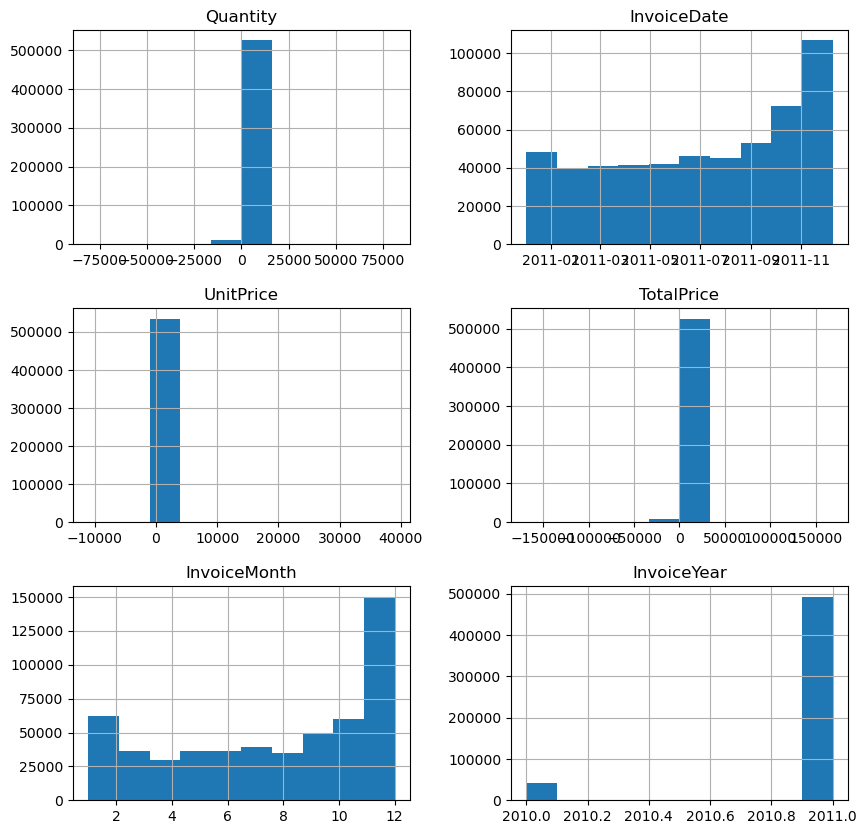

In [17]:
# Plot histograms of all the numerical columns
ecommerce_data.hist(figsize=(10,10),bins=10)
plt.show()

In [18]:
# Creating a column for TransactionType column 
ecommerce_data['TransactionType'] = ecommerce_data['Quantity'].apply(lambda x: 'Return' if x < 0 else 'Sale')

# Checking 
ecommerce_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,InvoiceYear,TransactionType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,2010,Sale
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,Sale
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,2010,Sale
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,Sale
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,Sale


## 6. Saving cleaned data to a csv file

In [19]:
ecommerce_data.to_csv('cleaned_ecommerce_data.csv',index=False)